<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Jorge Calvo</h3>
    
<h1>Complejidad en Criptografía</h1>
    <h2>Factorización entera y Logaritmo discreto</h2>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>.

</body>
</html>

### Prueba experimental del aumento de bits en p y q
#### Crecimiento exponencial

In [1]:
!pip install libnum

In [2]:
import libnum
import math
import time
import matplotlib.pyplot as plt

In [3]:
# Función para factorizar n por división por prueba
def factorize(n):
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return i, n // i
    return n, 1

In [8]:
bits=1024
primo=libnum.generate_prime(bits)
print(primo)

117601961405238112691478819288409267622233213895808027223088068526065722827207387690625903013301284024993048662124880603609299376767394539209815784096063792759579742769452710007636824593204420536697544926863059226480417403310632831223045858307921149818622792244097703513919016950837996147990531514162773165643


Bits: 8, p: 139, q: 197, n: 27383, Tiempo: 0.000017 s
Bits: 10, p: 619, q: 683, n: 422777, Tiempo: 0.000070 s
Bits: 12, p: 2087, q: 2657, n: 5545159, Tiempo: 0.000226 s
Bits: 14, p: 11657, q: 12451, n: 145141307, Tiempo: 0.001262 s
Bits: 16, p: 64709, q: 64067, n: 4145711503, Tiempo: 0.014197 s
Bits: 24, p: 9236707, q: 15537157, n: 143512166821999, Tiempo: 2.225139 s
Bits: 28, p: 228010691, q: 158660501, n: 36176290467416191, Tiempo: 13.835920 s
Bits: 32, p: 3616389547, q: 2461714391, n: 8902518191311870877, Tiempo: 295.434340 s


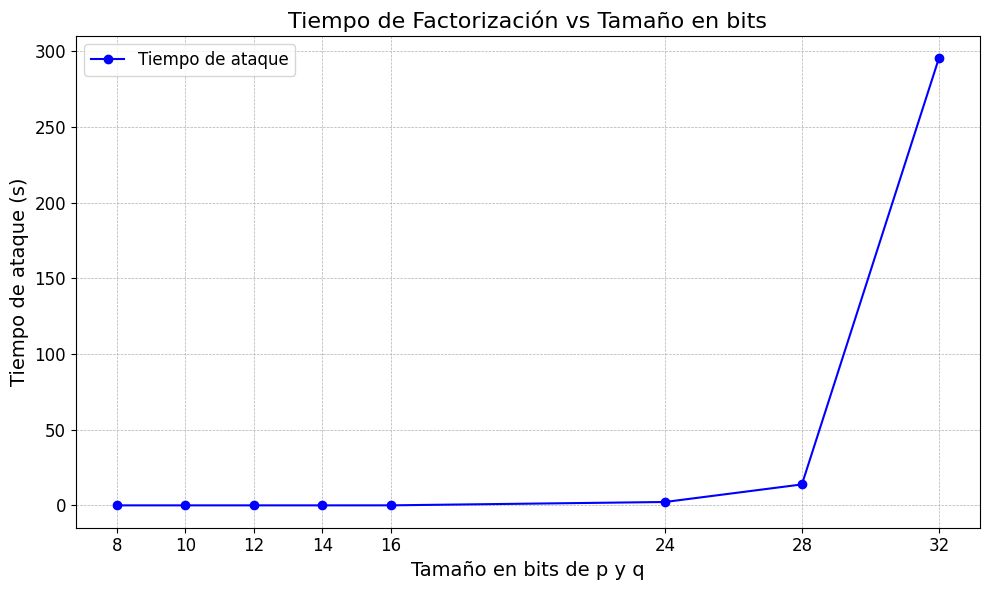

In [5]:


# Lista de tamaños en bits para los primos
bit_sizes = [8, 10, 12, 14, 16,24,28,32]  # Se pueden ampliar a valores mayores para ver mayor diferencia
attack_times = []

# Para cada tamaño en bits se genera p, q, se calcula n y se mide el tiempo de factorización
for bits in bit_sizes:
    p,q =libnum.generate_prime(bits), libnum.generate_prime(bits)
    n=p*q

    start_time = time.perf_counter()
    factorize(n)
    end_time = time.perf_counter()

    elapsed_time = end_time - start_time
    attack_times.append(elapsed_time)

    print(f"Bits: {bits}, p: {p}, q: {q}, n: {n}, Tiempo: {elapsed_time:.6f} s")

# Graficar los resultados con una gráfica más visual y clara
plt.figure(figsize=(10, 6))
plt.plot(bit_sizes, attack_times, marker='o', linestyle='-', color='b', label='Tiempo de ataque')
plt.xlabel("Tamaño en bits de p y q", fontsize=14)
plt.ylabel("Tiempo de ataque (s)", fontsize=14)
plt.title("Tiempo de Factorización vs Tamaño en bits", fontsize=16)
plt.xticks(bit_sizes, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Problema del Logaritmo Discreto y su Complejidad

El **logaritmo discreto** consiste en encontrar el entero \( x \) que satisface:

$$
\
g^x \equiv y \pmod{p}
\
$$

donde:

- \( p \) es un número primo.
- \( g \) es una raíz primitiva de \( p \)
- \( y \) es un entero tal que \( y = g^x \mod p \).

Existen diferentes métodos para resolver este problema:
1. **Búsqueda Exhaustiva (Brute Force):**  
   Se prueban todos los valores \( x = 0, 1, 2, \dots, p-1 \). Su complejidad es \( O(p) \) y resulta ineficiente para valores grandes.
2. **Baby-step Giant-step (BSGS):**  
   Este algoritmo reduce la complejidad a \( O(\sqrt{p}) \) dividiendo el problema en dos fases (baby-steps y giant-steps).

En este experimento vamos a medir el tiempo de ejecución de ambos métodos para distintos tamaños en bits de \( p \), y a graficar los resultados para ver la mejora que ofrece el método BSGS.
 en bits.


Bits: 12, p: 2927, g: 5, x_true: 103, x_bf: 103, x_bsgs: 103
Tiempo Brute Force: 0.000045 s, Tiempo BSGS: 0.000234 s

Bits: 14, p: 10837, g: 2, x_true: 10372, x_bf: 10372, x_bsgs: 10372
Tiempo Brute Force: 0.006103 s, Tiempo BSGS: 0.000053 s

Bits: 16, p: 47543, g: 5, x_true: 19444, x_bf: 19444, x_bsgs: 19444
Tiempo Brute Force: 0.014876 s, Tiempo BSGS: 0.000110 s

Bits: 24, p: 9655991, g: 7, x_true: 4314332, x_bf: 4314332, x_bsgs: 4314332
Tiempo Brute Force: 6.045286 s, Tiempo BSGS: 0.002542 s

Bits: 28, p: 237145901, g: 7, x_true: 131540969, x_bf: 131540969, x_bsgs: 131540969
Tiempo Brute Force: 260.971185 s, Tiempo BSGS: 0.016425 s



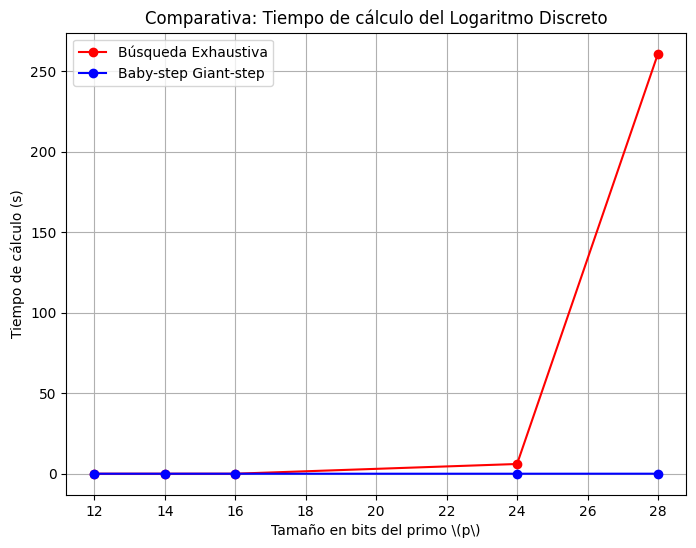

In [7]:
import math
import time
import random
import matplotlib.pyplot as plt
import sympy  # Para generar primos y obtener raíces primitivas

def discrete_log_brute_force(g, y, p):
    """
    Calcula el logaritmo discreto de forma exhaustiva.
    Dado g, y y p, busca el entero x tal que:

        g^x ≡ y (mod p)

    Retorna x si se encuentra, o None si no se halla.
    """
    for x in range(p):
        if pow(g, x, p) == y:
            return x
    return None

# Baby-step Giant-step (BSGS)
def discrete_log_bsgs(g, y, p):
    m = math.isqrt(p - 1) + 1  # m = ceil(sqrt(p-1))
    # Baby-steps: precomputamos g^j for j = 0, 1, ..., m-1
    baby_steps = {}
    for j in range(m):
        baby_steps[pow(g, j, p)] = j

    # Calcular g^(-m) mod p
    c = pow(g, m, p)
    c_inv = pow(c, -1, p)  # O bien usando sympy.mod_inverse(c, p)

    gamma = y
    for i in range(m):
        if gamma in baby_steps:
            return i * m + baby_steps[gamma]
        gamma = (gamma * c_inv) % p
    return None

# Lista de tamaños en bits para p
bit_sizes = [12, 14, 16,24,28]  # Se pueden agregar tamaños mayores (con precaución)
times_bruteforce = []
times_bsgs = []

# Para cada tamaño en bits, se genera un primo, se obtiene una raíz primitiva,
# se elige un exponente secreto x, se calcula y y se mide el tiempo para hallar x
for bits in bit_sizes:
    p = libnum.generate_prime(bits)
    g = sympy.primitive_root(p)

    x_true = random.randint(1, p-1)
    y_val = pow(g, x_true, p)

    # Medir tiempo para brute force
    start_time = time.perf_counter()
    x_bf = discrete_log_brute_force(g, y_val, p)
    end_time = time.perf_counter()
    t_bf = end_time - start_time
    times_bruteforce.append(t_bf)

    # Medir tiempo para BSGS
    start_time = time.perf_counter()
    x_bsgs = discrete_log_bsgs(g, y_val, p)
    end_time = time.perf_counter()
    t_bsgs = end_time - start_time
    times_bsgs.append(t_bsgs)

    print(f"Bits: {bits}, p: {p}, g: {g}, x_true: {x_true}, x_bf: {x_bf}, x_bsgs: {x_bsgs}")
    print(f"Tiempo Brute Force: {t_bf:.6f} s, Tiempo BSGS: {t_bsgs:.6f} s\n")

# Graficar la comparativa
plt.figure(figsize=(8,6))
plt.plot(bit_sizes, times_bruteforce, marker='o', linestyle='-', color='red', label='Búsqueda Exhaustiva')
plt.plot(bit_sizes, times_bsgs, marker='o', linestyle='-', color='blue', label='Baby-step Giant-step')
plt.xlabel("Tamaño en bits del primo \(p\)")
plt.ylabel("Tiempo de cálculo (s)")
plt.title("Comparativa: Tiempo de cálculo del Logaritmo Discreto")
plt.grid(True)
plt.legend()
plt.show()
